In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier


In [7]:
df = pd.read_csv(r"D:\projects\Heart_attack_predictor\Heart_Attack.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df['target'].value_counts(normalize=True)*100

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64

In [11]:
numerical_features = ['trestbps', 'chol', 'thalach']

# Standardization (z-score scaling)
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Normalization (min-max scaling)
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.to_csv('scaled_dataset.csv', index=False)


In [12]:
X = df.drop('target', axis=1)
y = df['target']

#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((227, 13), (76, 13), (227,), (76,))

## Decision tree

Accuracy for Decision Tree:

 93.42105263157895
Sensitivity for Decision Tree: 96.15384615384616
 Specificity for Decision Tree: 92.0
Testing Precision for Decision Tree: 86.20689655172413
f1_score for Decision Tree: 90.9090909090909
classification_report for Decision Tree:               precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.92      0.98      0.95        47

    accuracy                           0.93        76
   macro avg       0.94      0.92      0.93        76
weighted avg       0.94      0.93      0.93        76



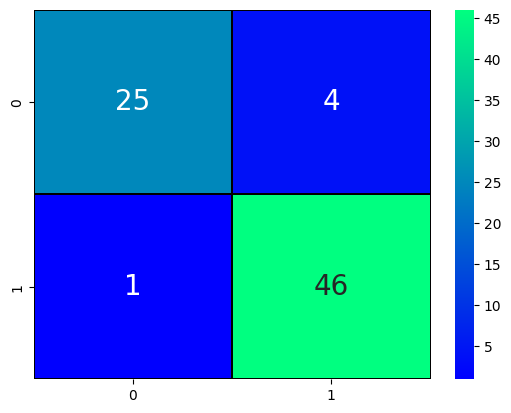

In [13]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})


TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
accuracy_DT=((TP+TN)/(TP+TN+FN+FP))
print('Accuracy for Decision Tree:',accuracy_DT*100)
print('Sensitivity for Decision Tree:',(TP/(TP+FN))* 100)
print(' Specificity for Decision Tree:',(TN/(TN+FP))* 100)
print('Testing Precision for Decision Tree:',(TP/(TP+FP))* 100)
print('f1_score for Decision Tree:',(2*TP/(2*TP+FP+FN))* 100)

print('classification_report for Decision Tree:',classification_report(y_test,prediction))

In [14]:
#feature engineering
X_train['age_chol_interaction'] = X_train['age'] * X_train['chol']
X_test['age_chol_interaction'] = X_test['age'] * X_test['chol']
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_chol_interaction
244,56,1,0,0.358491,0.132420,0,0,0.259542,1,2.1,1,1,1,7.415525
247,66,1,1,0.622642,0.273973,0,1,0.374046,1,0.0,1,3,1,18.082192
253,67,1,0,0.056604,0.394977,0,0,0.412214,1,0.9,1,2,2,26.463470
105,68,0,2,0.245283,0.194064,0,0,0.335878,0,1.5,1,0,2,13.196347
206,59,1,0,0.150943,0.257991,0,0,0.541985,1,1.2,1,1,3,15.221461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,55,1,1,0.339623,0.310502,0,1,0.641221,0,0.0,2,0,2,17.077626
211,61,1,0,0.245283,0.305936,0,1,0.526718,1,3.6,1,1,3,18.662100
33,54,1,2,0.292453,0.335616,0,0,0.618321,0,0.5,0,1,2,18.123288
257,50,1,0,0.471698,0.168950,0,0,0.419847,1,0.9,1,0,3,8.447489


## Logistic Regression

In [15]:

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
accuracy_LR=((TP+TN)/(TP+TN+FN+FP))
print('Accuracy  for logistic Regression:',accuracy_LR*100)
print('Sensitivity for logistic Regression :',(TP/(TP+FN))*100)
print('Specificity for logistic Regression:',(TN/(TN+FP))*100)
print('Precision for logistic Regression:',(TP/(TP+FP))*100)
print('f1_score for logistic Regression:',(2*TP/(2*TP+FP+FN))*100)

print('classification_report for logistic Regression:',classification_report(y_test,prediction1))

Accuracy  for logistic Regression: 82.89473684210526
Sensitivity for logistic Regression : 80.76923076923077
Specificity for logistic Regression: 84.0
Precision for logistic Regression: 72.41379310344827
f1_score for logistic Regression: 76.36363636363637
classification_report for logistic Regression:               precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.84      0.89      0.87        47

    accuracy                           0.83        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.83      0.83      0.83        76



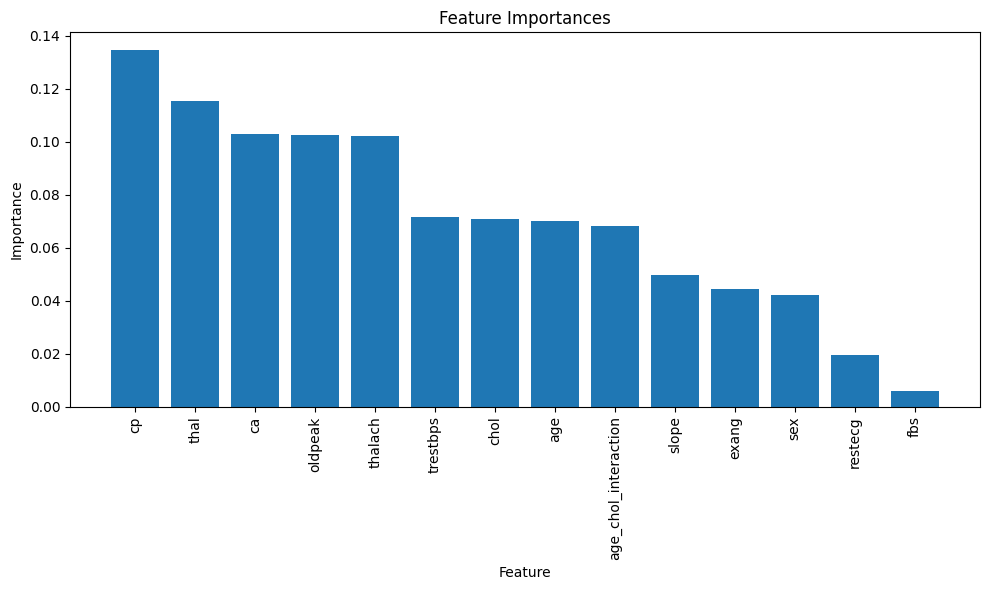

In [16]:
  
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
feature_names = X_train.columns 
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.tight_layout()
plt.show()


## Random Forest Classifier

Accuracy for Random Forest: 84.21052631578947
Sensitivity for Random Forest: 77.41935483870968
Specificity for Random Forest: 88.88888888888889
Precision for Random Forest: 82.75862068965517
f1_score for Random Forest: 80.0
classification_report for Random Forest:               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.89      0.85      0.87        47

    accuracy                           0.84        76
   macro avg       0.83      0.84      0.83        76
weighted avg       0.85      0.84      0.84        76



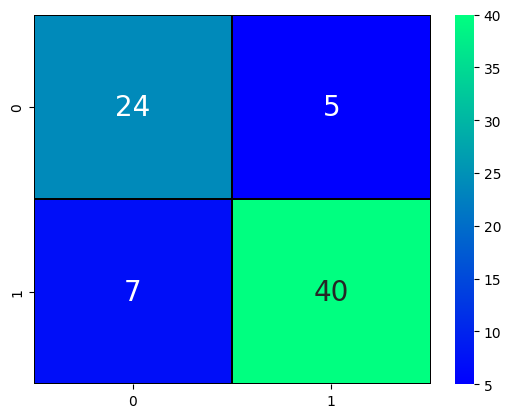

In [17]:

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

rfc = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=8, min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3 = confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})

TP = cm3[0][0]
TN = cm3[1][1]
FN = cm3[1][0]
FP = cm3[0][1]

accuracy_RF = ((TP + TN) / (TP + TN + FN + FP))
print('Accuracy for Random Forest:', accuracy_RF* 100 )
print('Sensitivity for Random Forest:', (TP / (TP + FN))* 100)
print('Specificity for Random Forest:', (TN / (TN + FP))* 100)
print('Precision for Random Forest:', (TP / (TP + FP))* 100)
print('f1_score for Random Forest:', (2 * TP / (2 * TP + FP + FN))* 100)

print('classification_report for Random Forest:',classification_report(y_test,prediction3))

## Data visualization

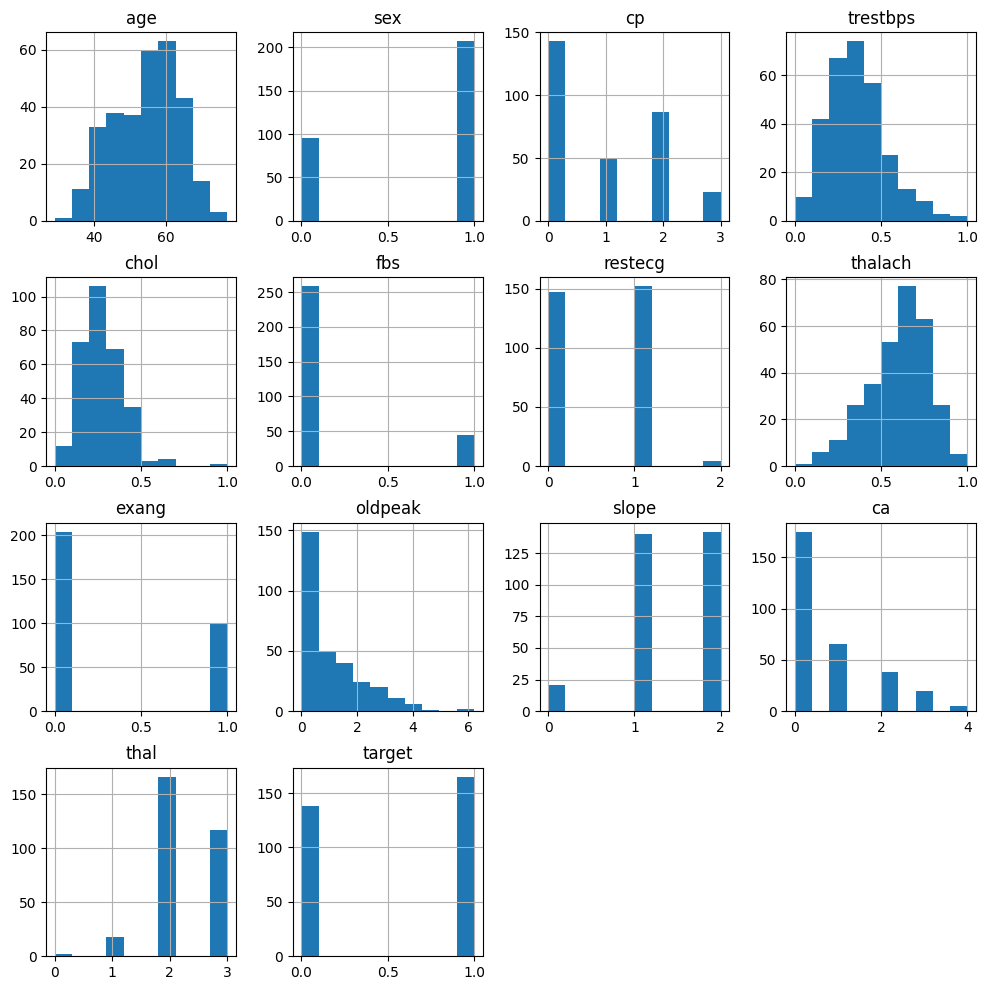

In [18]:
df.hist(figsize=(12,12))
plt.show()

<Axes: xlabel='age', ylabel='count'>

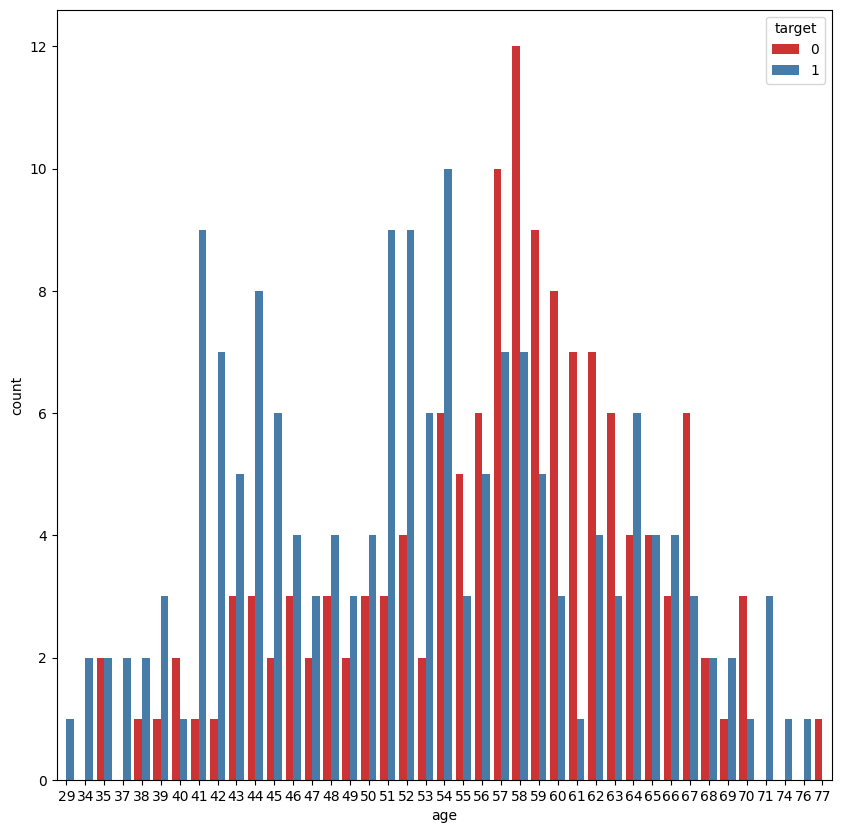

In [19]:
#barplot
plt.figure(figsize=(10,10))
sns.countplot(x='age',hue='target',data=df,palette='Set1')

<Axes: >

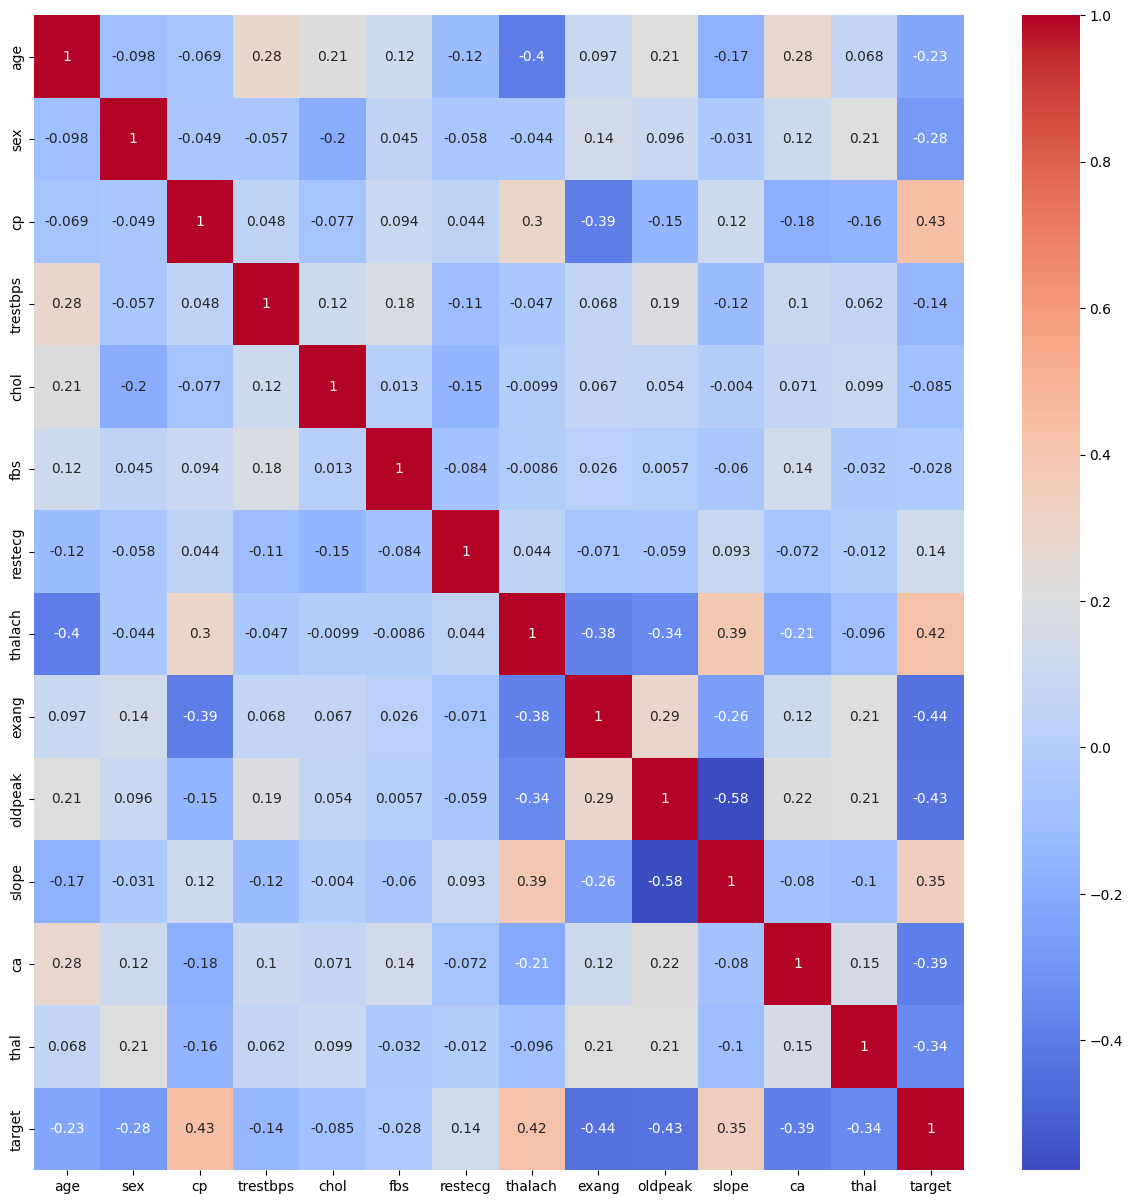

In [20]:
#correration matrix
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')

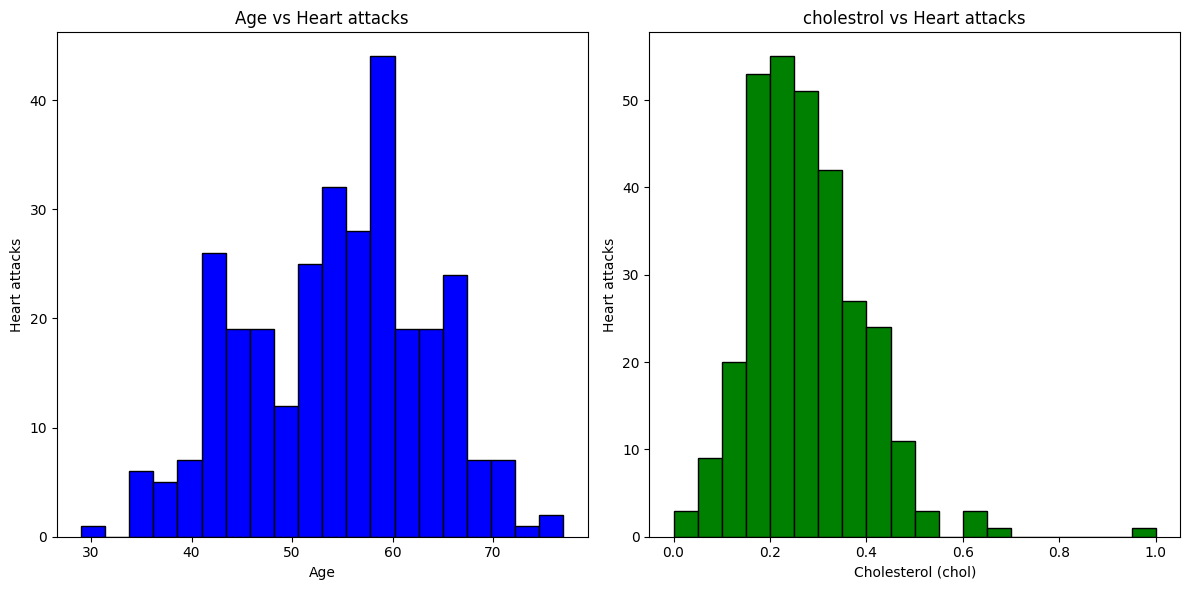

In [21]:
import matplotlib.pyplot as plt

# Create histograms for 'age' and 'chol'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Heart attacks')
plt.title('Age vs Heart attacks')

plt.subplot(1, 2, 2)
plt.hist(df['chol'], bins=20, color='green', edgecolor='black')
plt.xlabel('Cholesterol (chol)')
plt.ylabel('Heart attacks')
plt.title('cholestrol vs Heart attacks')
plt.tight_layout()
plt.show()


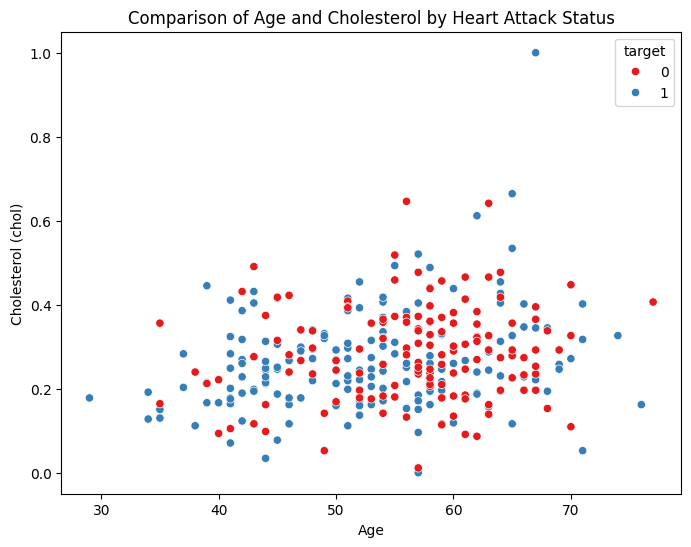

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Cholesterol (chol)')
plt.title('Comparison of Age and Cholesterol by Heart Attack Status')
plt.show()


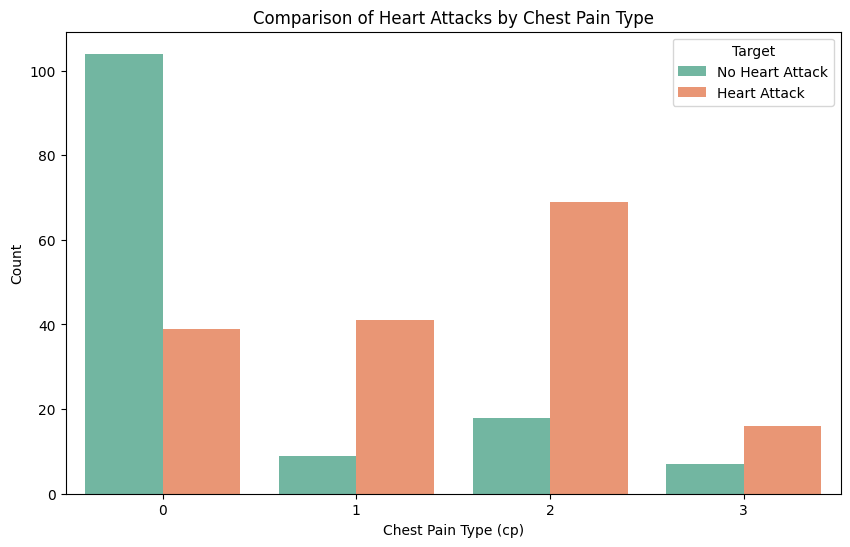

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='target', palette='Set2')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.title('Comparison of Heart Attacks by Chest Pain Type')
plt.legend(title='Target', labels=['No Heart Attack', 'Heart Attack'])
plt.show()


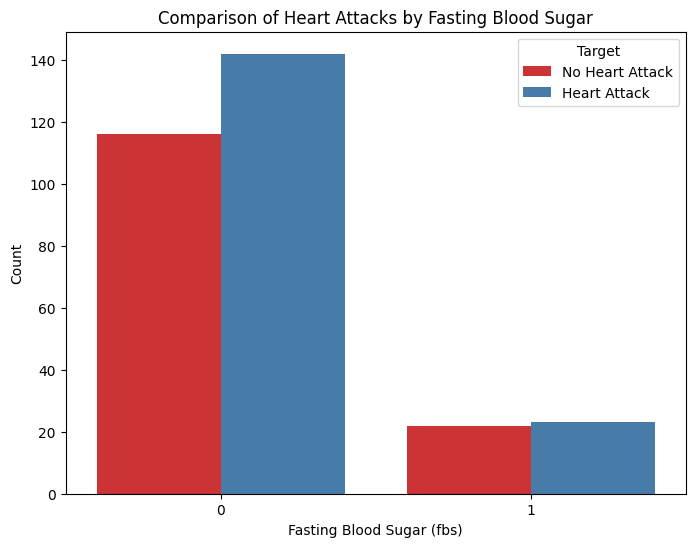

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fbs', hue='target', palette='Set1')
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Count')
plt.title('Comparison of Heart Attacks by Fasting Blood Sugar')
plt.legend(title='Target', labels=['No Heart Attack', 'Heart Attack'])
plt.show()


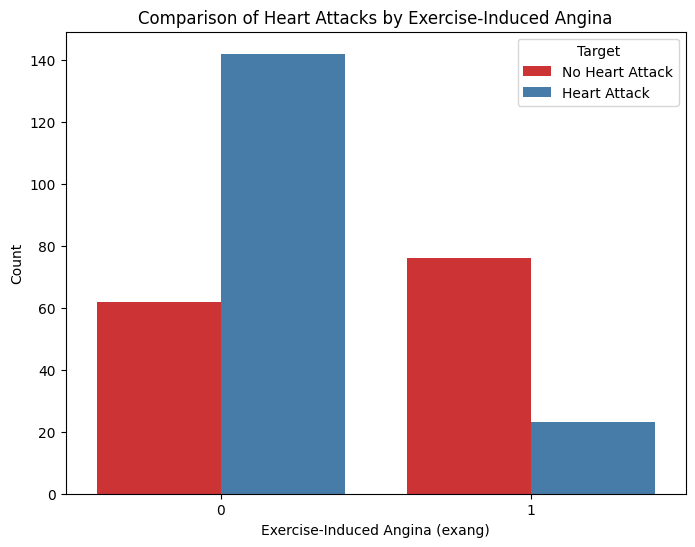

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='exang', hue='target', palette='Set1')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.title('Comparison of Heart Attacks by Exercise-Induced Angina')
plt.legend(title='Target', labels=['No Heart Attack', 'Heart Attack'])
plt.show()


c:\Users\91866\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


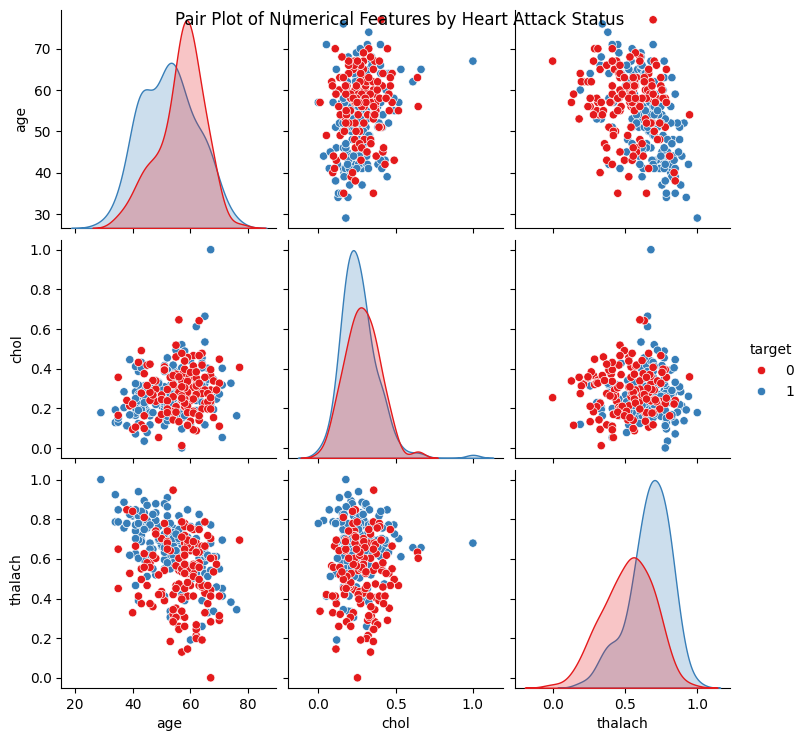

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ['age', 'chol', 'thalach', 'target']

sns.pairplot(df[selected_cols], hue='target', palette='Set1')
plt.suptitle('Pair Plot of Numerical Features by Heart Attack Status')
plt.show()


# Hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2', None], 
    'solver': ['lbfgs'],  
    'max_iter': [100, 500, 1000]  
}

lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best model:", accuracy)


Best hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy with best model: 0.8421052631578947


c:\Users\91866\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Error and loss curves

Iteration 100: Log Loss = 0.3702
Iteration 200: Log Loss = 0.3702
Iteration 300: Log Loss = 0.3702
Iteration 400: Log Loss = 0.3702
Iteration 500: Log Loss = 0.3702
Iteration 600: Log Loss = 0.3702
Iteration 700: Log Loss = 0.3702
Iteration 800: Log Loss = 0.3702
Iteration 900: Log Loss = 0.3702
Iteration 1000: Log Loss = 0.3702


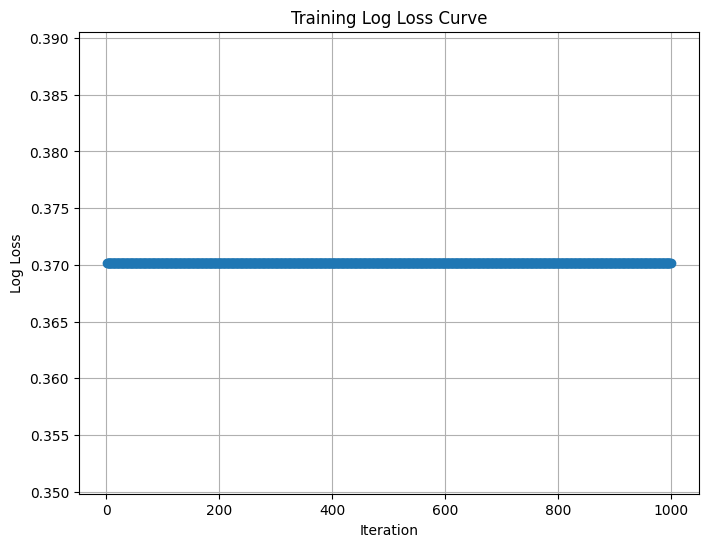

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

log_losses = []
iterations = []
for iteration in range(1, 1001):
    lr.fit(X_train, y_train)
    y_pred_proba = lr.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    log_losses.append(loss)
    iterations.append(iteration)

    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Log Loss = {loss:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(iterations, log_losses, marker='o', linestyle='-')
plt.title("Training Log Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()


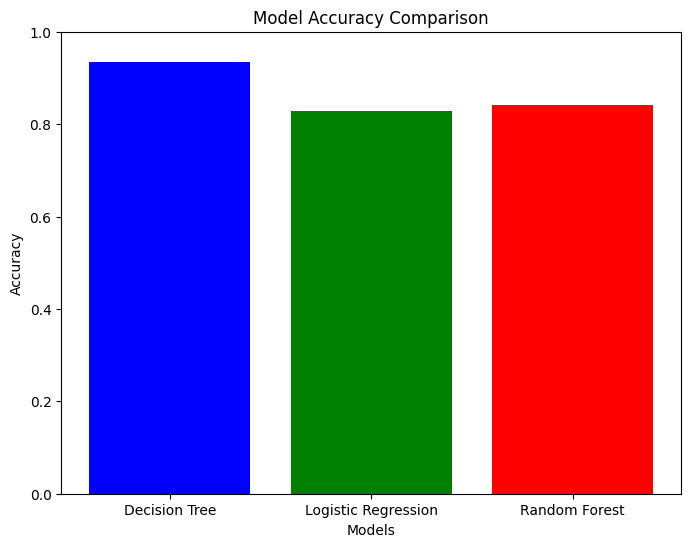

In [29]:
#compare the accuracy of the three models decision tree,logistic regression and random forest using graph
import matplotlib.pyplot as plt

models = ["Decision Tree", "Logistic Regression", "Random Forest"]
accuracies = [accuracy_DT, accuracy_LR, accuracy_RF]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  
plt.show()


# probablistic model


Hidden Markov Models (HMMs)

In [39]:
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train an HMM
n_components = 2  # You may need to adjust the number of states based on your problem
model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100)
model.fit(X_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.4342105263157895


knn

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train a KNN classifier
k_neighbors = 3  # You may need to adjust the number of neighbors based on your problem
model = KNeighborsClassifier(n_neighbors=k_neighbors)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7894736842105263


ensemble

Bagging (Bootstrap Aggregating):

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a BaggingClassifier with DecisionTree base estimator
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7894736842105263


c:\Users\91866\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create an AdaBoostClassifier with DecisionTree base estimator
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7894736842105263


c:\Users\91866\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Stacking

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create base models
base_models = [('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
               ('svm', SVC(kernel='linear', C=1, probability=True, random_state=42))]

# Create a StackingClassifier with Logistic Regression as the meta-model
model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.868421052631579


Blending

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create base models
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_lr = LogisticRegression(random_state=42)
model_svm = SVC(kernel='linear', C=1, probability=True, random_state=42)

# Train base models on different subsets of the training data
model_rf.fit(X_train, y_train)
model_lr.fit(X_train.iloc[:len(X_train)//2], y_train.iloc[:len(y_train)//2])
model_svm.fit(X_train.iloc[len(X_train)//2:], y_train.iloc[len(y_train)//2:])

# Predictions from each base model
pred_rf = model_rf.predict(X_test)
pred_lr = model_lr.predict(X_test)
pred_svm = model_svm.predict(X_test)

# Combine predictions using a blending model (e.g., weighted average)
final_pred = (pred_rf + pred_lr + pred_svm) / 3

# Convert final predictions to binary (if needed)
final_pred_binary = [1 if pred >= 0.5 else 0 for pred in final_pred]

# Evaluate the blended model (accuracy in this case)
accuracy = accuracy_score(y_test, final_pred_binary)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8552631578947368


c:\Users\91866\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensionality reduction

PCA

In [53]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
# Load or prepare your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply PCA with the desired number of components
num_components = 5  # You can adjust this based on your requirements
pca = PCA(n_components=num_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_standardized)

# Transform the testing data using the same PCA transformation
X_test_pca = pca.transform(X_test_standardized)

# Create a RandomForestClassifier using the transformed data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Optionally, you can also inspect the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# Visualize the results or use the transformed data in your analysis


Accuracy: 0.8421052631578947
Explained Variance Ratio: [0.24294245 0.11914657 0.09168517 0.0822075  0.07592897]


VISUALIZATION

GridSearchCV for hyperparameter tuning:

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with PCA: 0.8289473684210527
Confusion Matrix:
[[29  6]
 [ 7 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



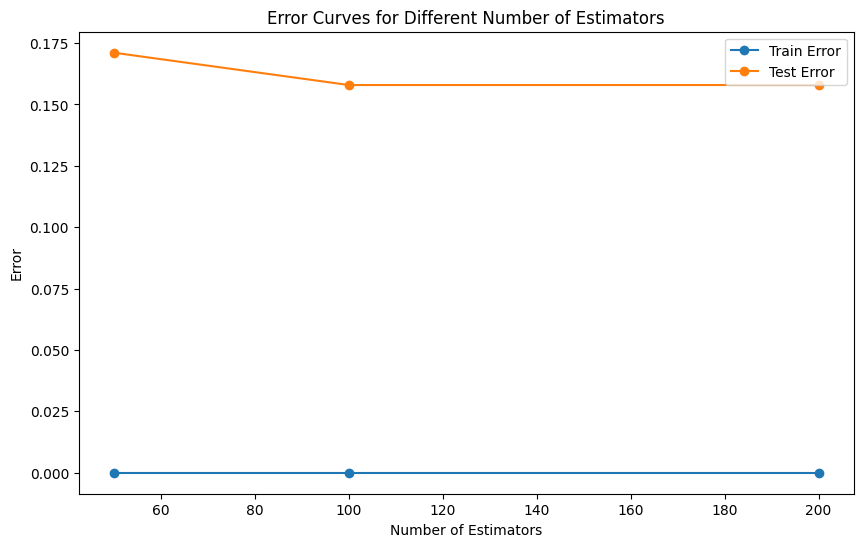

In [55]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset with features and 'target' as the binary classification label
# Load or prepare your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data for PCA
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply PCA with the desired number of components
num_components = 5  # You can adjust this based on your requirements
pca = PCA(n_components=num_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_standardized)

# Transform the testing data using the same PCA transformation
X_test_pca = pca.transform(X_test_standardized)

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Predict on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred_pca = best_rf_model.predict(X_test_pca)

# Evaluate the model with PCA (accuracy in this case)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy with PCA: {accuracy_pca}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred_pca)
print(f'Classification Report:\n{class_report}')

# Error/Loss Curves
train_errors = []
test_errors = []

for n_estimators in param_grid['n_estimators']:
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
    model.fit(X_train_pca, y_train)
    
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)
    
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

# Plot Error Curves
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], train_errors, label='Train Error', marker='o')
plt.plot(param_grid['n_estimators'], test_errors, label='Test Error', marker='o')
plt.title('Error Curves for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.show()
